## _**Uber and Lyft**_ 

1. Setup and Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
df = pd.read_csv('rideshare_kaggle.csv')

print(df.info)
print(df.describe())

<bound method DataFrame.info of                                           id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

       

In [5]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [6]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

In [8]:
df.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

2. Data Cleaning and  Normalization

In [9]:
print(df.isnull().sum())
df.dropna(inplace=True)

df = df[df['price'] > 0]

df.drop_duplicates(inplace=True)

df.drop(columns=['id', 'timezone', 'datetime', 'timestamp', 'product_id', "long_summary", 'icon' ], inplace=True)
categorical_cols = ['cab_type', 'source', 'destination', 'name', "short_summary"]
df = pd.get_dummies(df, columns=categorical_cols)


x = df.drop(columns=['price'], axis=1)
y = df['price']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


cov_matrix = df.cov()['price'].abs()
relevant_columns = cov_matrix[cov_matrix > 0.05].index.tolist()
df = df[relevant_columns]

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

3. Training and Splitting 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

4. Baseline Linear Regression

Linear Regression Results:
MAE: 1.748258623187827
MSE: 6.188727236797337
R2: 0.9289597503745521


D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


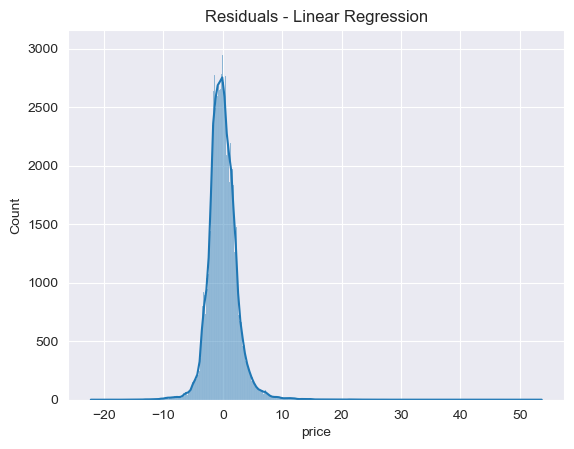

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

sns.histplot(y_test - y_pred, kde=True)
plt.title("Residuals - Linear Regression")
plt.show()

5. Ridge & Lasso Regression with Grid Search


Ridge Regression:
Best alpha: 100
MAE: 1.7480657720980368
MSE: 6.1885976509955185
R2: 0.9289612378868235

Lasso Regression:
Best alpha: 0.01
MAE: 1.7446936412392713
MSE: 6.191345751847055
R2: 0.9289296925039008


D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


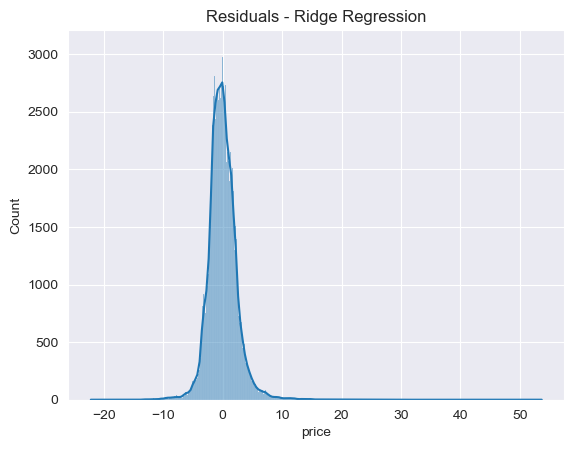

D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


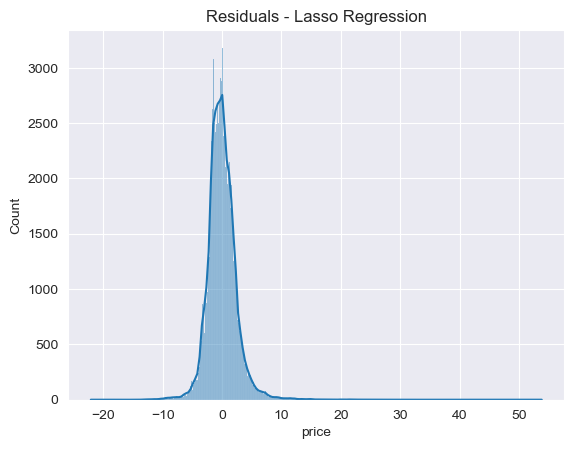

In [12]:
ridge_params = {'alpha': [0.1, 1, 10, 50, 100]}
ridge = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)

lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)

print("\nRidge Regression:")
print("Best alpha:", ridge.best_params_['alpha'])
print("MAE:", mean_absolute_error(y_test, y_ridge))
print("MSE:", mean_squared_error(y_test, y_ridge))
print("R2:", r2_score(y_test, y_ridge))

print("\nLasso Regression:")
print("Best alpha:", lasso.best_params_['alpha'])
print("MAE:", mean_absolute_error(y_test, y_lasso))
print("MSE:", mean_squared_error(y_test, y_lasso))
print("R2:", r2_score(y_test, y_lasso))

sns.histplot(y_test - y_ridge, kde=True)
plt.title("Residuals - Ridge Regression")
plt.show()

sns.histplot(y_test - y_lasso, kde=True)
plt.title("Residuals - Lasso Regression")
plt.show()

6. Polynomial Regression (Degree 2)

MAE: 1.1767533918089126
MSE: 3.0495168789815645
R2: 0.9649946698197064


D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


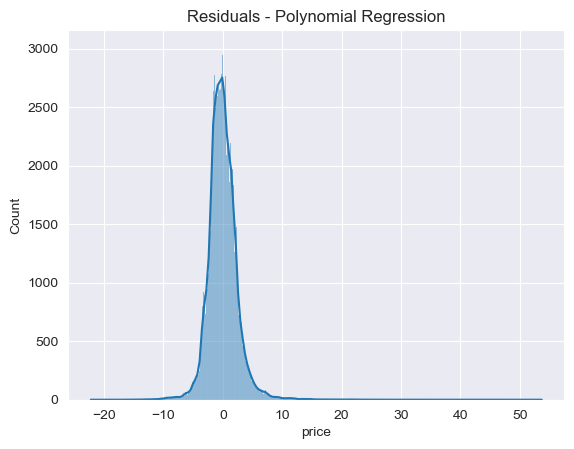

In [13]:
poly_model = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_model.fit_transform(X_train)
X_test_poly = poly_model.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_poly = model.predict(X_test_poly)


print("MAE:", mean_absolute_error(y_test, y_poly))
print("MSE:", mean_squared_error(y_test, y_poly))
print("R2:", r2_score(y_test, y_poly))

sns.histplot(y_test - y_pred, kde=True)
plt.title("Residuals - Polynomial Regression")
plt.show()

7. Feature Engineering 


After Feature Engineering:
MAE: 1.754229514798139
MSE: 6.183260521762141
R2: 0.9289844277788266


D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


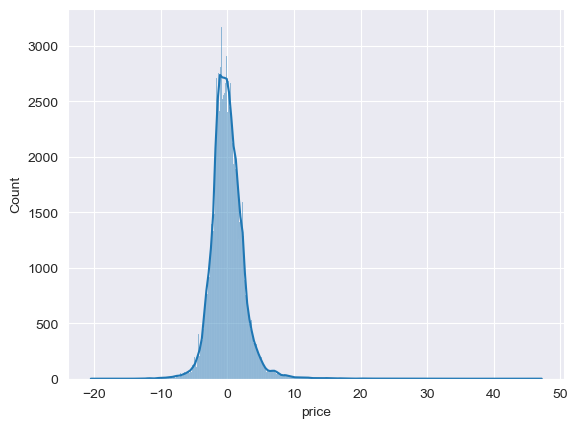

In [14]:
df['distance_squared'] = df['distance'] ** 2
df['price_per_mile'] = df['price'] / df['distance']
df.dropna(inplace=True)

x = df.drop(columns=['price'], axis=1)
y = df['price']
X_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)


ridge_final = Ridge(alpha = 10)
ridge_final.fit(X_train, y_train)
y_enhanced = ridge_final.predict(X_test)

print("\nAfter Feature Engineering:")
print("MAE:", mean_absolute_error(y_test, y_enhanced))
print("MSE:", mean_squared_error(y_test, y_enhanced))
print("R2:", r2_score(y_test, y_enhanced))

sns.histplot(y_test - y_enhanced, kde=True)
plt.show()

8. Bonus: Time_based Feature + Transformations


Bonus Model with Time & Transformations:
MAE: 1.7402962098829726
MSE: 6.059434484868409
R2: 0.9305334278576859


D:\Programs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


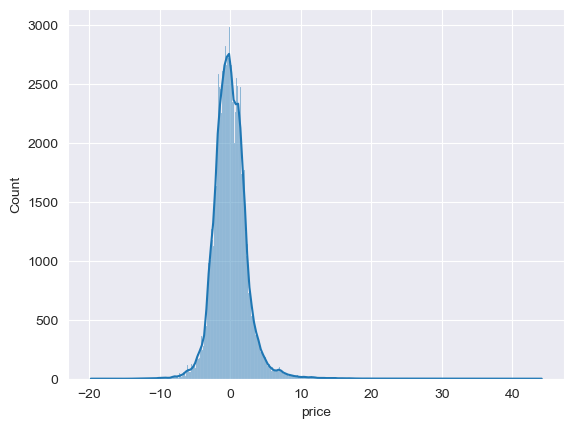

In [16]:
df_bonus = pd.read_csv('rideshare_kaggle.csv')
df_bonus = df_bonus[df_bonus['price'] > 0].dropna()


df_bonus['hour'] = pd.to_datetime(df_bonus['timestamp'], unit='ms').dt.hour


df_bonus['log_distance'] = np.log1p(df_bonus['distance'])
df_bonus['distance_squared'] = df_bonus['distance'] ** 2
df_bonus['price_per_mile'] = df_bonus['price'] / df_bonus['distance']


df_bonus.drop(columns=['id', 'timezone', 'datetime', 'product_id', "long_summary", 'icon'], inplace=True)
df_bonus = pd.get_dummies(df_bonus, columns=categorical_cols, drop_first=True)
df_bonus.drop(columns=['timestamp'], inplace=True)



df_bonus.dropna(inplace=True)


x = df_bonus.drop(columns=['price'], axis=1)
y = df_bonus['price']
X_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)


final_model = Ridge(alpha = 10)
final_model.fit(X_train, y_train)
y_final = final_model.predict(X_test)

print("\nBonus Model with Time & Transformations:")
print("MAE:", mean_absolute_error(y_test, y_final))
print("MSE:", mean_squared_error(y_test, y_final))
print("R2:", r2_score(y_test, y_final))

sns.histplot(y_test - y_final, kde=True)
plt.show()